In [7]:
import main as core
from main import *
from rich import *
from rich import pretty
from importlib import reload
core = reload(core)
pretty.install()
core.delay = 1

In [8]:
table, index, items = core.read_excel(1)
items

[
    '序号',
    '提交答卷时间',
    '所用时间',
    '来源',
    '来源详情',
    '来自IP',
    '1、您所在的城市具有地摊经济吗？',
    '2、您所在的城市是【选填】',
    '3、您在地摊经济中的角色是？',
    '4、您对于地摊经济的看法是【选填】',
    '5、您认为您符合以下哪一项？',
    '6、您消费的地摊经济类型主要包括【多选】',
    '7、您认为地摊经济的优点包括',
    '8、您认为地摊经济的缺点包括',
    '9、以下应对地摊经济弊端的对策，您认为有效的是',
    '10、以下地摊经济的发展方向，您认可的有',
    '11、现在几大电商平台都有扶持地摊经济的行动。您认为以下途径中有效的包括 [排序题]',
    '12、您在摆摊时是否遇到困难（与城管之间的矛盾、与摆摊地商圈商贩之间的矛盾等等）？如果有可否举例？',
    '13、您认为参与摆地摊需要哪些帮助（可从政府、督察机构、摆摊者自身、消费者等等角度说明，非常感谢！）？'
]

##### 提交时间分布-散点图

In [9]:
core.show_submit_time(table, index)

##### 用时分布-散点图

In [14]:
show_time_used(table, index)

##### 提交时间与用时的分布-散点图

In [11]:
save_and_show(
    Scatter(init_opts=get_init_options(360))
    .add_xaxis([parse_time(i).int_timestamp for i in table["提交答卷时间"]])
    .add_yaxis("答卷", [int(i[:-1]) for i in table["所用时间"]], symbol_size=4)
    .set_global_opts(
        title_opts=opts.TitleOpts(title="散点图"),
        yaxis_opts=opts.AxisOpts(name="用时/s"),
        xaxis_opts=opts.AxisOpts(is_scale=True, name="提交时间/ms"),
    )
    .set_series_opts(
        label_opts=opts.LabelOpts(False),
    ),
    f"用时分布与提交时间的关系_散点图"
)

<matplotlib.collections.PathCollection object at 0x0000020C18468850>

<Figure size 432x288 with 1 Axes>

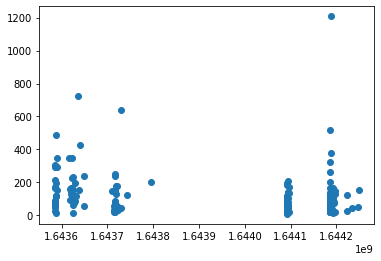

In [12]:
from matplotlib import pyplot as plt

plt.scatter([parse_time(i).int_timestamp for i in table["提交答卷时间"]],[int(i[:-1]) for i in table["所用时间"]])